# Database Fundamentals and Applications &ndash; Tutorial 5 &ndash; Part III &ndash; Answers

In this part of the tutorial, you will use this Jupyter Notebook to connect to your MySQL Server from Python. In particular, you will establish a connection to the $\texttt{world}$ database. You will use this connection to carry out several basic SQL queries, followed by using Python's pandas package, to provide some basic descriptive statistics.

## Getting started

### Connect Python to MySQL

Before Python can connect to your MySQL Server, you need to install the MySQL-Python connector. Run the code below to install this connector.

In [1]:
# install mysql connector
!pip install mysql-connector-python

Please run the cell below to load all the necessary packages. 

In [2]:
# import packages
import mysql.connector
import pandas as pd
import scipy.stats as stats
%matplotlib inline

Use the code below to establish a connection to the $\texttt{world}$ database on your local MySQL Server. **Do not forget to change the password!**

In [3]:
# connect to Yelp
connection = mysql.connector.connect(host = "localhost",
                                     user = "root",
                                     password = "root",
                                     db = "world")

**If you run into errors executing the code above, try restaring the kernel**: in the 'Kernel' menu, click 'Restart'. If this does not help, try installing the newest MySQL-Python connector from https://dev.mysql.com/downloads/connector/python/8.0.html. Do not forget to restart the kernel after installation.

### Testing the connection

In Part III of the tutorial, you will primarily use Python's Pandas package to extract, clean, and visualise the data. The code below demostrates how to execute a SQL statement using Pandas, and extract a DataFrame.

In [4]:
# select first 20 rows from the country table
data = pd.read_sql_query("SELECT * \
                          FROM country \
                          LIMIT 20",
                         connection)
# let's inspect the data
data.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix,129.0,AW
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar,1.0,AF
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II,62.0,AI
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL


## Questions

### Basic counts

How many rows are there in the tables country, city, and countrylanguage?

In [5]:
# count the number of rows in country
data = pd.read_sql_query("SELECT COUNT(*) FROM country",
                         connection)
print("Number of rows in country = " + str(data.iloc[0,0]))
# count the number of rows in city
data = pd.read_sql_query("SELECT COUNT(*) FROM city",
                         connection)
print("Number of rows in city = " + str(data.iloc[0,0]))
# count the number of rows in city
data = pd.read_sql_query("SELECT COUNT(*) FROM countrylanguage",
                         connection)
print("Number of rows in countrylanguage = " + str(data.iloc[0,0]))

Number of rows in country = 239
Number of rows in city = 4079
Number of rows in countrylanguage = 984


### Number of cities per country

Find all countries that have at least 50 cities in the city tables. For those countries, report the name of the country as countryName, and report the number of cities in that country as numCities. Create a horizontal bar plot showing the number of cities per country in the result of your query.

<AxesSubplot:ylabel='countryName'>

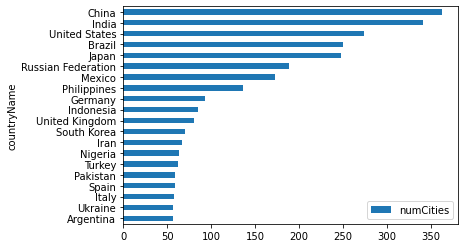

In [6]:
data = pd.read_sql_query("SELECT country.name AS countryName, count(*) AS numCities \
                          FROM country, city \
                          WHERE country.code = city.countryCode \
                          GROUP BY country.name \
                          HAVING numCities > 50 \
                          ORDER BY numCities",
                         connection)
# create horizontal bar plot
data.plot.barh(x='countryName', y='numCities')

### City names that appear in more than one country

Write and execute a query showing all city names that appear in more than two countries. Also report in how many distinct countries that city name appears. Return the name as cityName and the count as numCountries.

In [7]:
data = pd.read_sql_query("SELECT city.name AS cityName, count(DISTINCT country.code) AS numCountries \
                          FROM country, city \
                          WHERE country.code = city.countryCode \
                          GROUP BY city.name \
                          HAVING numCountries > 2",
                         connection)
# let's see the result
print(data)

     cityName  numCountries
0   Cambridge             3
1     Córdoba             3
2    Hamilton             3
3        León             3
4    San Jose             3
5  San Miguel             3
6      Toledo             3
7    Valencia             3
8    Victoria             3


### Number of languages per country

For each country, find out how many languages are spoken in that country according to the countrylanguage table. For each country, return countryName as well as the count of the number of languages. Call this count numLanguages.

In [8]:
data = pd.read_sql_query("SELECT country.name AS countryName, COUNT(*) AS numLanguages \
                          FROM country, countrylanguage \
                          WHERE country.code = countrylanguage.CountryCode \
                          GROUP BY country.name",
                         connection)
# print the first few rows
data.head()

,countryName,numLanguages
0,Aruba,4
1,Afghanistan,5
2,Angola,9
3,Anguilla,1
4,Albania,3


Now, plot a histogram of numLanguages, and perform a Jarque-Bera test on the normality of numLanguages. What do you conclude? Is the number of languages per country normally distributed?

Jarque_beraResult(statistic=40.390205842434575, pvalue=1.6958140447442815e-09)

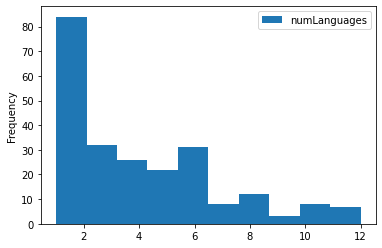

In [9]:
# plot the histogram of the number of languages per country
data.plot.hist(y='numLanguages')
# perform a Jarque-Bera test of normality (null hypothesis)
stats.jarque_bera(data['numLanguages'])

#### Conclusion:
With a *p*-value $\ll$ 0.05, there is strong evidence that numLanguages is not normally distributed.

### Number of official and unofficial languages per country

For each country, again return countryName and numLanguages. But now, in addition, return the number of languages that are official (name this field numLangOff) as well as the number of languages that are not official (name this field numLangUnoff).

In [10]:
data = pd.read_sql_query("SELECT country.name AS countryName, \
                          COUNT(*) AS numLanguages, \
                          CAST( \
                              SUM( \
                                  CASE \
                                      WHEN isOfficial = 'T' THEN 1 \
                                      ELSE 0 \
                                  END \
                              ) AS SIGNED \
                          ) AS numLangOff, \
                          CAST( \
                              SUM( \
                                  CASE \
                                      WHEN isOfficial = 'T' THEN 0 \
                                      ELSE 1 \
                                  END \
                              ) AS SIGNED \
                          ) AS numLangUnoff \
                          FROM country, countrylanguage \
                          WHERE country.code = countrylanguage.CountryCode \
                          GROUP BY country.name",
                         connection)
# print the first few rows
data.head()

,countryName,numLanguages,numLangOff,numLangUnoff
0,Aruba,4,1,3
1,Afghanistan,5,2,3
2,Angola,9,0,9
3,Anguilla,1,1,0
4,Albania,3,1,2


Create scatter plots of (1) numLangOff versus numLangUnoff, (2) numLangOff versus numLanguages , and (3) numLangUnoff versus numLanguages. In addition, compute the correlation matrix of data using DataFrame's $\texttt{corr()}$ method.

,numLanguages,numLangOff,numLangUnoff
numLanguages,1.000000,-0.096659,0.968776
numLangOff,-0.096659,1.000000,-0.340418
numLangUnoff,0.968776,-0.340418,1.000000


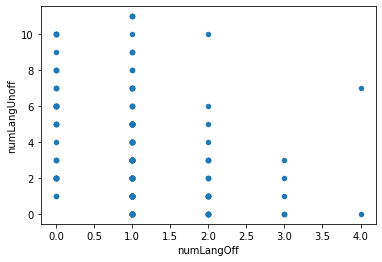

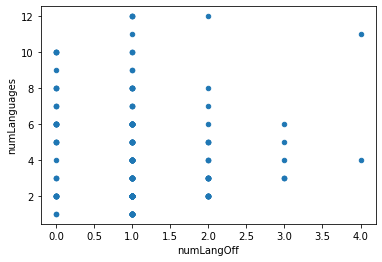

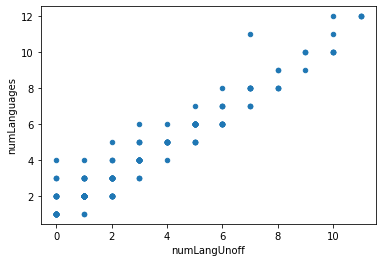

In [11]:
# create scatter plot of numLangOff versus numLangUnoff
data.plot.scatter(x='numLangOff',y='numLangUnoff')
# create scatter plot of numLangOff versus numLanguages
data.plot.scatter(x='numLangOff',y='numLanguages')
# create scatter plot of numLangUnoff versus numLanguages
data.plot.scatter(x='numLangUnoff',y='numLanguages')
# compute the correlation matrix of the numbers of languages
data.corr()

What do you conclude? Which variables are most strongly correlated? What's the interpretation of this strong correlation? And what would the *R*<sup>2</sup> be if you would regress numLanguages on numLangOff and numLangUnoff jointly?

#### Conclusion:
The total number of languages and the number of unofficial languages have the strongest correlation. That is to say, most of the variation in the number of languages seems to be captured by the number of unofficial languages. The number of official languages seems hardly correlated with the total number of languages. Finally, the total number of languages is explained perfectly by the number of official and unofficial languages, as the former is simply determined by the sum of the latter. So an *R*<sup>2</sup>=1 would result.